# 2023 NBA Championship Predictor

**Daniel I. Leon**

Welcome! For this project, we will collect, visualize, and classify NBA data from 2003-2022 in order to predict the outcome of the 2023 NBA playoffs. Specifically, we'll observe how regular season data predicts the total number of playoff wins.

To begin, let's import the [NBA API](https://github.com/swar/nba_api) and store the data available from every team in NBA history into a pandas DataFrame. Note that we specify that we want to only use regular season stats for our predictions.

In [1]:
import pandas as pd
from nba_api.stats.static import teams
from nba_api.stats.endpoints import teamyearbyyearstats
import time

pd.set_option('display.max_columns', None)

# Get a list of all team IDs
team_list = teams.get_teams()
team_ids = [team['id'] for team in team_list]

# Initialize an empty DataFrame to store the stats
team_stats = pd.DataFrame()

# Iterate through each team and get their year-by-year stats
for team_id in team_ids:
    time.sleep(1) # avoids making too many accesses to the NBA database at once
    
    stats = teamyearbyyearstats.TeamYearByYearStats(team_id=team_id, season_type_all_star='Regular Season')
    stats_df = stats.get_data_frames()[0]
    team_stats = pd.concat([team_stats, stats_df])

team_stats

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,PO_WINS,PO_LOSSES,CONF_COUNT,DIV_COUNT,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
0,1610612737,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,3,1,2,NaN,6,N/A,1818,0,0.000,0,0,0.000,0,2308,0.727,0,0,0,1330,2057,0,0,0,5313,10
1,1610612737,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,5,0,0,NaN,5,N/A,1988,0,0.000,0,0,0.000,0,2425,0.723,0,0,0,1476,2092,0,0,0,5730,3
2,1610612737,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,5,0,0,NaN,6,N/A,1674,0,0.000,0,0,0.000,0,2177,0.682,0,0,0,1229,1848,0,0,0,4833,10
3,1610612737,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,5,0,0,NaN,5,N/A,1873,0,0.000,0,0,0.000,0,2400,0.685,0,0,0,1427,2120,0,0,0,5389,9
4,1610612737,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,4,0,0,NaN,4,N/A,1757,0,0.000,0,0,0.000,0,2205,0.691,0,0,0,1298,1771,0,0,0,5038,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1610612766,Charlotte,Hornets,2018-19,82,39,43,0.476,9,2,0,0,15.0,5,N/A,3297,7362,0.448,977,2783,0.351,1510,1895,0.797,814,2778,3592,1905,1550,591,1001,405,9081,19
29,1610612766,Charlotte,Hornets,2019-20,65,23,42,0.354,10,4,0,0,15.0,5,N/A,2425,5586,0.434,785,2231,0.352,1052,1406,0.748,715,2066,2781,1549,1223,428,949,268,6687,30
30,1610612766,Charlotte,Hornets,2020-21,72,33,39,0.458,10,4,0,0,15.0,5,N/A,2875,6324,0.455,985,2666,0.369,1146,1505,0.761,762,2389,3151,1933,1298,565,1069,344,7881,23
31,1610612766,Charlotte,Hornets,2021-22,82,43,39,0.524,10,3,0,0,15.0,5,N/A,3508,7497,0.468,1143,3130,0.365,1298,1753,0.740,888,2767,3655,2302,1629,707,1087,402,9457,4


Next, let's filter out data from seasons prior to the 2002-03 season (the first season in which each playoff series was best-of-seven). Then, we'll separate the current season (2022-23) from the other seasons, since this season is not labeled with playoff outcomes and cannot be used to train or test the dataset.

In [2]:
length = len(team_stats)

# Each value will be set to True if the years match
indices = [False for i in range(length)]
second = [False for i in range(length)]

year = list(team_stats['YEAR'])

for i in range(length):
    start = int(year[i][:4])
    
    if start >= 2002 and start < 2022:
        indices[i] = True
    
    elif start == 2022:
        second[i] = True

current = team_stats[second]
modern_stats = team_stats[indices]
current = current.reset_index()
modern_stats = modern_stats.reset_index()

modern_stats

,index,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,PO_WINS,PO_LOSSES,CONF_COUNT,DIV_COUNT,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
0,53,1610612737,Atlanta,Hawks,2002-03,82,35,47,0.427,11,5,0,0,15.0,8,N/A,2859,6434,0.444,402,1141,0.352,1594,2011,0.793,937,2558,3495,1679,1783,611,1367,473,7714,18
1,54,1610612737,Atlanta,Hawks,2003-04,82,28,54,0.341,12,7,0,0,15.0,8,N/A,2829,6529,0.433,419,1249,0.335,1534,1976,0.776,996,2507,3503,1648,1826,627,1350,408,7611,15
2,55,1610612737,Atlanta,Hawks,2004-05,82,13,69,0.159,15,5,0,0,15.0,5,N/A,2942,6672,0.441,304,973,0.312,1417,1994,0.711,1100,2335,3435,1614,2009,629,1319,344,7605,28
3,56,1610612737,Atlanta,Hawks,2005-06,82,26,56,0.317,14,5,0,0,15.0,5,N/A,2946,6496,0.454,424,1154,0.367,1656,2207,0.750,1069,2232,3301,1625,2054,587,1284,394,7972,16
4,57,1610612737,Atlanta,Hawks,2006-07,82,30,52,0.366,13,5,0,0,15.0,5,N/A,2831,6372,0.444,341,1038,0.329,1677,2203,0.761,976,2312,3288,1573,1970,609,1306,446,7680,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,27,1610612766,Charlotte,Hornets,2017-18,82,36,46,0.439,10,3,0,0,15.0,5,N/A,3197,7106,0.450,824,2233,0.369,1656,2216,0.747,827,2901,3728,1770,1409,559,1041,373,8874,10
594,28,1610612766,Charlotte,Hornets,2018-19,82,39,43,0.476,9,2,0,0,15.0,5,N/A,3297,7362,0.448,977,2783,0.351,1510,1895,0.797,814,2778,3592,1905,1550,591,1001,405,9081,19
595,29,1610612766,Charlotte,Hornets,2019-20,65,23,42,0.354,10,4,0,0,15.0,5,N/A,2425,5586,0.434,785,2231,0.352,1052,1406,0.748,715,2066,2781,1549,1223,428,949,268,6687,30
596,30,1610612766,Charlotte,Hornets,2020-21,72,33,39,0.458,10,4,0,0,15.0,5,N/A,2875,6324,0.455,985,2666,0.369,1146,1505,0.761,762,2389,3151,1933,1298,565,1069,344,7881,23


The 2011-12 regular season was shortened from 82 to 66 games due to the 2011 NBA lockout. This makes per-game stats more useful than totals, let's create columns in our DataFrames that contain this data.

In [3]:
# Set the value of 'APG' to 0 if 'GP' is 0 or null
modern_stats['APG'] = modern_stats['AST'] / modern_stats['GP'].replace({0: 1})

# Do the same for other stats
modern_stats['DRPG'] = modern_stats['DREB'] / modern_stats['GP'].replace({0: 1})
modern_stats['RPG'] = modern_stats['REB'] / modern_stats['GP'].replace({0: 1})
modern_stats['BPG'] = modern_stats['BLK'] / modern_stats['GP'].replace({0: 1})
modern_stats['SPG'] = modern_stats['STL'] / modern_stats['GP'].replace({0: 1})

# Do the same for current
current['APG'] = current['AST'] / current['GP'].replace({0: 1})
current['DRPG'] = current['DREB'] / current['GP'].replace({0: 1})
current['RPG'] = current['REB'] / current['GP'].replace({0: 1})
current['BPG'] = current['BLK'] / current['GP'].replace({0: 1})
current['SPG'] = current['STL'] / current['GP'].replace({0: 1})

modern_stats

,index,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,PO_WINS,PO_LOSSES,CONF_COUNT,DIV_COUNT,NBA_FINALS_APPEARANCE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK,APG,DRPG,RPG,BPG,SPG
0,53,1610612737,Atlanta,Hawks,2002-03,82,35,47,0.427,11,5,0,0,15.0,8,N/A,2859,6434,0.444,402,1141,0.352,1594,2011,0.793,937,2558,3495,1679,1783,611,1367,473,7714,18,20.475610,31.195122,42.621951,5.768293,7.451220
1,54,1610612737,Atlanta,Hawks,2003-04,82,28,54,0.341,12,7,0,0,15.0,8,N/A,2829,6529,0.433,419,1249,0.335,1534,1976,0.776,996,2507,3503,1648,1826,627,1350,408,7611,15,20.097561,30.573171,42.719512,4.975610,7.646341
2,55,1610612737,Atlanta,Hawks,2004-05,82,13,69,0.159,15,5,0,0,15.0,5,N/A,2942,6672,0.441,304,973,0.312,1417,1994,0.711,1100,2335,3435,1614,2009,629,1319,344,7605,28,19.682927,28.475610,41.890244,4.195122,7.670732
3,56,1610612737,Atlanta,Hawks,2005-06,82,26,56,0.317,14,5,0,0,15.0,5,N/A,2946,6496,0.454,424,1154,0.367,1656,2207,0.750,1069,2232,3301,1625,2054,587,1284,394,7972,16,19.817073,27.219512,40.256098,4.804878,7.158537
4,57,1610612737,Atlanta,Hawks,2006-07,82,30,52,0.366,13,5,0,0,15.0,5,N/A,2831,6372,0.444,341,1038,0.329,1677,2203,0.761,976,2312,3288,1573,1970,609,1306,446,7680,30,19.182927,28.195122,40.097561,5.439024,7.426829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,27,1610612766,Charlotte,Hornets,2017-18,82,36,46,0.439,10,3,0,0,15.0,5,N/A,3197,7106,0.450,824,2233,0.369,1656,2216,0.747,827,2901,3728,1770,1409,559,1041,373,8874,10,21.585366,35.378049,45.463415,4.548780,6.817073
594,28,1610612766,Charlotte,Hornets,2018-19,82,39,43,0.476,9,2,0,0,15.0,5,N/A,3297,7362,0.448,977,2783,0.351,1510,1895,0.797,814,2778,3592,1905,1550,591,1001,405,9081,19,23.231707,33.878049,43.804878,4.939024,7.207317
595,29,1610612766,Charlotte,Hornets,2019-20,65,23,42,0.354,10,4,0,0,15.0,5,N/A,2425,5586,0.434,785,2231,0.352,1052,1406,0.748,715,2066,2781,1549,1223,428,949,268,6687,30,23.830769,31.784615,42.784615,4.123077,6.584615
596,30,1610612766,Charlotte,Hornets,2020-21,72,33,39,0.458,10,4,0,0,15.0,5,N/A,2875,6324,0.455,985,2666,0.369,1146,1505,0.761,762,2389,3151,1933,1298,565,1069,344,7881,23,26.847222,33.180556,43.763889,4.777778,7.847222


Here, we can visualize different columns in relation to the number of playoff wins by changing the x axis. Currently, we are looking at the correlation between defensive rebounds per game and the number of playoff wins.

<AxesSubplot:xlabel='DRPG', ylabel='PO_WINS'>

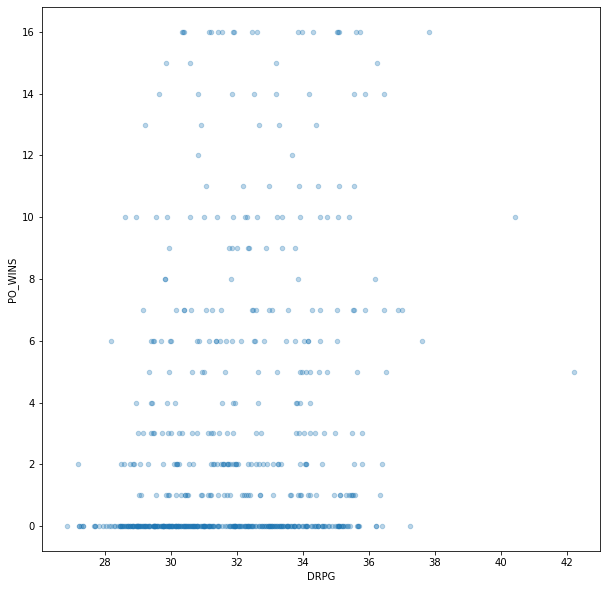

In [4]:
modern_stats.plot.scatter(x='DRPG', y='PO_WINS', figsize=(10, 10), alpha=0.3,
                   cmap='viridis')

Now, let's use a seaborn heatmap to view the numerical correlations between different stats. In particular, we'll look at the column labeled 'PO_WINS' to see which stats are best correlated with playoff success.

<AxesSubplot:>

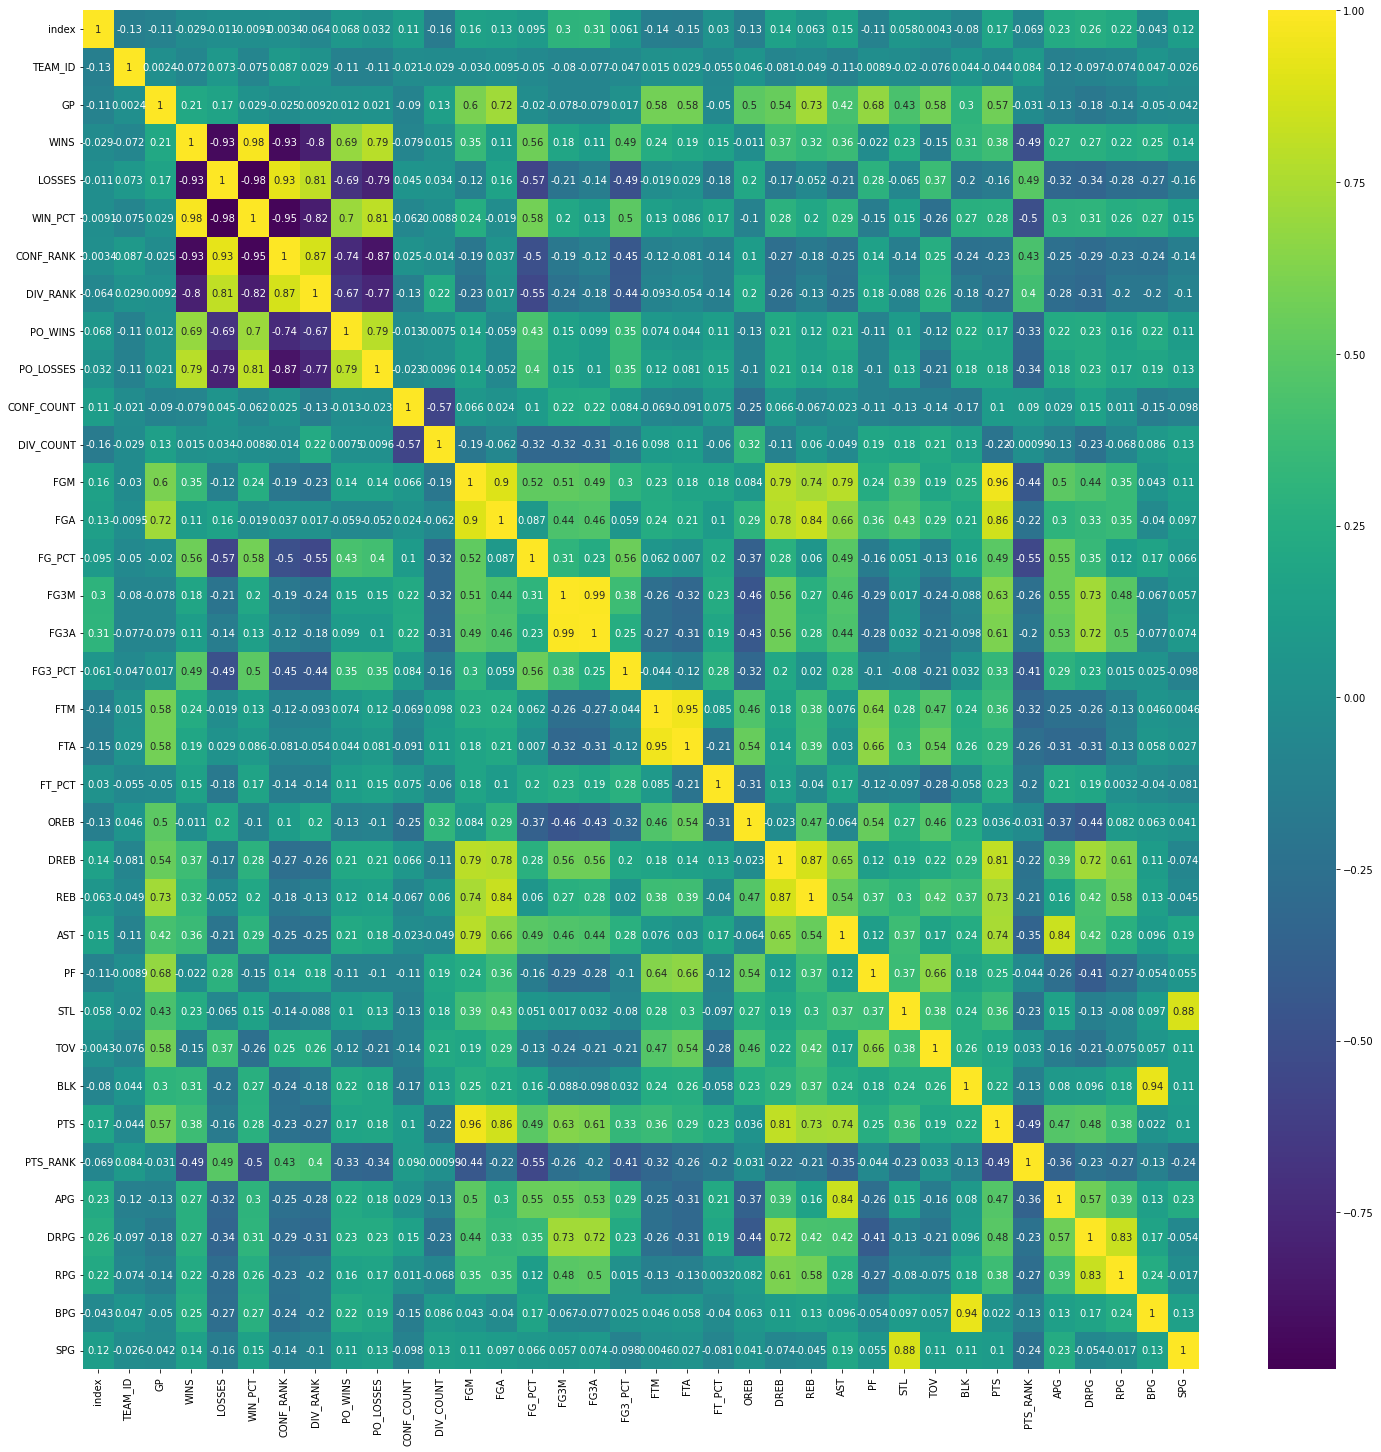

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,25))

# We want to see the correlation between all the other stats and PO_WINS
columns = modern_stats.columns.tolist()

# Compute the correlations between the selected columns
correlations = modern_stats[columns].corr()

# Create the heatmap
sns.heatmap(correlations, annot=True, cmap='viridis')

Now, we will select columns based on these visualizations, and use these to train an MLPClassifier. We will then modify the columns and repeat so we can figure out which combination of columns results in the highest accuracy (note that the columns listed currently are those which resulted in highest accuracy).

In [6]:
from sklearn.model_selection import train_test_split

columns = ['WIN_PCT',
           'CONF_RANK',
           'PTS_RANK',]

# Select the features and the target variable
X = modern_stats[columns]
y = modern_stats['PO_WINS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create an MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5000), activation='relu',
                    max_iter=3000, alpha=1e-6, solver='adam', verbose=10, tol=1e-10, random_state=1,
                    learning_rate_init=.01, learning_rate='adaptive', power_t=.5, n_iter_no_change=500)

# Train the model on the training set
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_mlp))

Iteration 1, loss = 5.41941216
Iteration 2, loss = 4.58836072
Iteration 3, loss = 2.19628423
Iteration 4, loss = 1.64269410
Iteration 5, loss = 1.53587801
Iteration 6, loss = 1.45499156
Iteration 7, loss = 1.38323270
Iteration 8, loss = 1.36078828
Iteration 9, loss = 1.30813393
Iteration 10, loss = 1.27768228
Iteration 11, loss = 1.25050131
Iteration 12, loss = 1.23429804
Iteration 13, loss = 1.22117703
Iteration 14, loss = 1.21184310
Iteration 15, loss = 1.20416363
Iteration 16, loss = 1.19212536
Iteration 17, loss = 1.18851544
Iteration 18, loss = 1.18744042
Iteration 19, loss = 1.18234419
Iteration 20, loss = 1.17701155
Iteration 21, loss = 1.17272609
Iteration 22, loss = 1.16362176
Iteration 23, loss = 1.16467750
Iteration 24, loss = 1.17284634
Iteration 25, loss = 1.17256504
Iteration 26, loss = 1.16917123
Iteration 27, loss = 1.18052004
Iteration 28, loss = 1.17737680
Iteration 29, loss = 1.16652691
Iteration 30, loss = 1.15014382
Iteration 31, loss = 1.15285436
Iteration 32, los

/Users/danielileon/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
import warnings
warnings.filterwarnings('ignore')

Now, let's generate a classification report so we can view other important stats about our model.

In [9]:
print(accuracy_score(y_test, y_pred_mlp))

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_mlp)
print(report)

0.575
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        68
           1       0.07      0.20      0.10         5
           2       0.33      0.25      0.29        12
           3       0.40      0.40      0.40         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.10      0.33      0.15         3
           7       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2
          10       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         0
          16       0.20      0.50      0.29         2

    accuracy                           0.57       120
   macro avg       0

Here, we'll use our model to predict the number of playoff wins for each team in the current regular season based on available data.

In [10]:
# Select the features and the target variable
X_current = current[columns]
y_current = current['PO_WINS']

# Make predictions on the current season's data
y_pred_current = mlp.predict(X_current)

playoff_win_predictions = y_pred_current

predictions_df = pd.DataFrame({'TEAM': current['TEAM_NAME'], 'PO_WINS_PRED_MLP': playoff_win_predictions})
predictions_df

,TEAM,PO_WINS_PRED_MLP
0,Hawks,0
1,Celtics,14
2,Cavaliers,3
3,Pelicans,7
4,Bulls,0
5,Mavericks,1
6,Nuggets,7
7,Warriors,0
8,Rockets,0
9,Clippers,10


To make this easier to digest, let's sort this DataFrame by the number of predicted playoff wins.

In [11]:
# Sort the DataFrame by the PO_WINS_PRED_MLP column in descending order
predictions_df_sorted = predictions_df.sort_values(by='PO_WINS_PRED_MLP', ascending=False)
predictions_df_sorted

,TEAM,PO_WINS_PRED_MLP
14,Nets,16
1,Celtics,14
9,Clippers,10
12,Bucks,8
3,Pelicans,7
6,Nuggets,7
19,Suns,6
26,Grizzlies,5
2,Cavaliers,3
15,Knicks,2


From here on out, we will repeat this process using different Classifiers. Scroll through to see the outcomes of each, as well as the ongoing averages. At the bottom we will discuss the final results and takeaways.

In [12]:
from sklearn.model_selection import train_test_split

columns = ['CONF_RANK',
           'FG_PCT',
           'FG3_PCT',
           'PTS_RANK',
           'APG',
           'DRPG']

# Select the features and the target variable
X = modern_stats[columns]
y = modern_stats['PO_WINS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=8) # 8

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6166666666666667


In [14]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.18      0.40      0.25         5
           2       0.23      0.25      0.24        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.33      0.25      0.29         4
           6       0.00      0.00      0.00         3
           7       0.33      0.20      0.25         5
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          16       0.40      1.00      0.57         2

    accuracy                           0.62       120
   macro avg       0.17      0.22      0.18       120
weighted avg       0.59      0.62      0.60       120



In [15]:
# Select the features and the target variable
X_current = current[columns]
y_current = current['PO_WINS']

# Make predictions on the current season's data
y_pred_current = rf.predict(X_current)

playoff_win_predictions = y_pred_current

predictions_df['PO_WINS_PRED_RF'] = playoff_win_predictions
predictions_df['Average'] = (predictions_df['PO_WINS_PRED_MLP'] + predictions_df['PO_WINS_PRED_RF']) / 2
predictions_df

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,Average
0,Hawks,0,0,0.0
1,Celtics,14,16,15.0
2,Cavaliers,3,6,4.5
3,Pelicans,7,16,11.5
4,Bulls,0,0,0.0
5,Mavericks,1,1,1.0
6,Nuggets,7,16,11.5
7,Warriors,0,0,0.0
8,Rockets,0,0,0.0
9,Clippers,10,3,6.5


In [16]:
# Sort the DataFrame by the Average column in descending order
predictions_df_sorted = predictions_df.sort_values(by='Average', ascending=False)
predictions_df_sorted

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,Average
14,Nets,16,16,16.0
1,Celtics,14,16,15.0
3,Pelicans,7,16,11.5
6,Nuggets,7,16,11.5
12,Bucks,8,9,8.5
19,Suns,6,7,6.5
9,Clippers,10,3,6.5
26,Grizzlies,5,7,6.0
2,Cavaliers,3,6,4.5
18,76ers,0,6,3.0


In [17]:
from sklearn.model_selection import train_test_split

columns = ['CONF_RANK',
           #'FG_PCT',
           #'FG3_PCT',
           'PTS_RANK',
           'APG',
           'DRPG']

# Select the features and the target variable
X = modern_stats[columns]
y = modern_stats['PO_WINS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# Create a KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=29, p=10)

# Train the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.65


In [19]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91        68
           1       0.38      0.60      0.46         5
           2       0.24      0.42      0.30        12
           3       0.33      0.40      0.36         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.50      0.20      0.29         5
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         2

    accuracy                           0.65       120
   macro avg       0.16      0.19      0.17       120
weighted avg       0.55      0.65      0.59       120



In [20]:
# Select the features and the target variable
X_current = current[columns]
y_current = current['PO_WINS']

# Make predictions on the current season's data
y_pred_current = knn.predict(X_current)

playoff_win_predictions = y_pred_current

predictions_df['PO_WINS_PRED_KNN'] = playoff_win_predictions

predictions_df.drop('Average', axis=1, inplace=True)
predictions_df['Average'] = (predictions_df['PO_WINS_PRED_MLP'] + 
                             predictions_df['PO_WINS_PRED_RF'] + 
                             predictions_df['PO_WINS_PRED_KNN']) / 3
predictions_df

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,Average
0,Hawks,0,0,0,0.000000
1,Celtics,14,16,6,12.000000
2,Cavaliers,3,6,6,5.000000
3,Pelicans,7,16,1,8.000000
4,Bulls,0,0,0,0.000000
5,Mavericks,1,1,1,1.000000
6,Nuggets,7,16,2,8.333333
7,Warriors,0,0,0,0.000000
8,Rockets,0,0,0,0.000000
9,Clippers,10,3,1,4.666667


In [21]:
# Sort the DataFrame by the Average column in descending order
predictions_df_sorted = predictions_df.sort_values(by='Average', ascending=False)
predictions_df_sorted

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,Average
1,Celtics,14,16,6,12.000000
14,Nets,16,16,1,11.000000
6,Nuggets,7,16,2,8.333333
3,Pelicans,7,16,1,8.000000
19,Suns,6,7,6,6.333333
12,Bucks,8,9,1,6.000000
2,Cavaliers,3,6,6,5.000000
26,Grizzlies,5,7,2,4.666667
9,Clippers,10,3,1,4.666667
18,76ers,0,6,0,2.000000


In [22]:
from sklearn.model_selection import train_test_split

columns = ['CONF_RANK',
           'FG_PCT',
           #'FG3_PCT',
           'PTS_RANK',
           'APG',
           'DRPG']

# Select the features and the target variable
X = modern_stats[columns]
y = modern_stats['PO_WINS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=5)

# Train the model on the training set
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6083333333333333


In [24]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        68
           1       0.07      0.20      0.11         5
           2       0.30      0.25      0.27        12
           3       0.50      0.40      0.44         5
           4       0.00      0.00      0.00         3
           5       0.25      0.25      0.25         4
           6       0.00      0.00      0.00         3
           7       1.00      0.40      0.57         5
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.67      0.50      0.57         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         0
          16       0.50      0.50      0.50         2

    accuracy              

In [25]:
# Select the features and the target variable
X_current = current[columns]
y_current = current['PO_WINS']

# Make predictions on the current season's data
y_pred_current = dt.predict(X_current)

playoff_win_predictions = y_pred_current

predictions_df['PO_WINS_PRED_DT'] = playoff_win_predictions

predictions_df.drop('Average', axis=1, inplace=True)
predictions_df['Average'] = (predictions_df['PO_WINS_PRED_MLP'] + 
                             predictions_df['PO_WINS_PRED_RF'] + 
                             predictions_df['PO_WINS_PRED_KNN'] +
                             predictions_df['PO_WINS_PRED_DT']) / 4
predictions_df

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,Average
0,Hawks,0,0,0,0,0.00
1,Celtics,14,16,6,14,12.50
2,Cavaliers,3,6,6,6,5.25
3,Pelicans,7,16,1,16,10.00
4,Bulls,0,0,0,0,0.00
5,Mavericks,1,1,1,2,1.25
6,Nuggets,7,16,2,13,9.50
7,Warriors,0,0,0,0,0.00
8,Rockets,0,0,0,0,0.00
9,Clippers,10,3,1,5,4.75


In [26]:
# Sort the DataFrame by the Average column in descending order
predictions_df_sorted = predictions_df.sort_values(by='Average', ascending=False)
predictions_df_sorted

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,Average
1,Celtics,14,16,6,14,12.50
3,Pelicans,7,16,1,16,10.00
6,Nuggets,7,16,2,13,9.50
14,Nets,16,16,1,5,9.50
12,Bucks,8,9,1,10,7.00
19,Suns,6,7,6,4,5.75
2,Cavaliers,3,6,6,6,5.25
26,Grizzlies,5,7,2,7,5.25
9,Clippers,10,3,1,5,4.75
18,76ers,0,6,0,6,3.00


In [27]:
from sklearn.model_selection import train_test_split

columns = ['CONF_RANK',
           #'FG_PCT',
           #'FG3_PCT',
           'PTS_RANK',
           'APG',
           'DRPG']

# Select the features and the target variable
X = modern_stats[columns]
y = modern_stats['PO_WINS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a LinearSVC
lsvc = LinearSVC(random_state=11, max_iter=5000)

# Train the model on the training set
lsvc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lsvc.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6166666666666667


In [29]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.96      0.90        68
           1       0.14      0.20      0.17         5
           2       0.23      0.42      0.29        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2
          10       0.33      0.25      0.29         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          16       0.18      1.00      0.31         2

    accuracy                           0.62       120
   macro avg       0.12      0.20      0.14       120
weighted avg       0.53      0.62      0.56       120



In [30]:
# Select the features and the target variable
X_current = current[columns]
y_current = current['PO_WINS']

# Make predictions on the current season's data
y_pred_current = lsvc.predict(X_current)

playoff_win_predictions = y_pred_current

predictions_df['PO_WINS_PRED_LSVC'] = playoff_win_predictions

predictions_df.drop('Average', axis=1, inplace=True)
predictions_df['Average'] = (predictions_df['PO_WINS_PRED_MLP'] + 
                             predictions_df['PO_WINS_PRED_RF'] + 
                             predictions_df['PO_WINS_PRED_KNN'] +
                             predictions_df['PO_WINS_PRED_DT'] +
                             predictions_df['PO_WINS_PRED_LSVC']) / 5
predictions_df

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,Average
0,Hawks,0,0,0,0,0,0.0
1,Celtics,14,16,6,14,16,13.2
2,Cavaliers,3,6,6,6,2,4.6
3,Pelicans,7,16,1,16,16,11.2
4,Bulls,0,0,0,0,0,0.0
5,Mavericks,1,1,1,2,0,1.0
6,Nuggets,7,16,2,13,16,10.8
7,Warriors,0,0,0,0,0,0.0
8,Rockets,0,0,0,0,0,0.0
9,Clippers,10,3,1,5,1,4.0


In [31]:
# Sort the DataFrame by the Average column in descending order
predictions_df_sorted = predictions_df.sort_values(by='Average', ascending=False)
predictions_df_sorted

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,Average
1,Celtics,14,16,6,14,16,13.2
3,Pelicans,7,16,1,16,16,11.2
6,Nuggets,7,16,2,13,16,10.8
14,Nets,16,16,1,5,16,10.8
12,Bucks,8,9,1,10,16,8.8
26,Grizzlies,5,7,2,7,16,7.4
19,Suns,6,7,6,4,2,5.0
2,Cavaliers,3,6,6,6,2,4.6
9,Clippers,10,3,1,5,1,4.0
18,76ers,0,6,0,6,2,2.8


In [32]:
from sklearn.model_selection import train_test_split

columns = ['CONF_RANK',
           #'FG_PCT',
           #'FG3_PCT',
           'PTS_RANK',
           'APG',
           'DRPG']

# Select the features and the target variable
X = modern_stats[columns]
y = modern_stats['PO_WINS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create an SGDClassifier
sgd = SGDClassifier(random_state=22, max_iter=5000) # 22

# Train the model on the training set
sgd.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.625


In [34]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.99      0.89        68
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00        12
           3       0.19      0.60      0.29         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.33      0.20      0.25         5
           9       0.00      0.00      0.00         2
          10       0.15      0.50      0.24         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         2

    accuracy                           0.62       120
   macro avg       0.15      0.19      0.15       120
weighted avg       0.52      0.62      0.56       120



In [35]:
# Select the features and the target variable
X_current = current[columns]
y_current = current['PO_WINS']

# Make predictions on the current season's data
y_pred_current = sgd.predict(X_current)

playoff_win_predictions = y_pred_current

predictions_df['PO_WINS_PRED_SGD'] = playoff_win_predictions

predictions_df.drop('Average', axis=1, inplace=True)
predictions_df['Average'] = (predictions_df['PO_WINS_PRED_MLP'] + 
                             predictions_df['PO_WINS_PRED_RF'] + 
                             predictions_df['PO_WINS_PRED_KNN'] +
                             predictions_df['PO_WINS_PRED_DT'] +
                             predictions_df['PO_WINS_PRED_LSVC'] +
                             predictions_df['PO_WINS_PRED_SGD']) / 6
predictions_df

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,PO_WINS_PRED_SGD,Average
0,Hawks,0,0,0,0,0,0,0.000000
1,Celtics,14,16,6,14,16,10,12.666667
2,Cavaliers,3,6,6,6,2,3,4.333333
3,Pelicans,7,16,1,16,16,7,10.500000
4,Bulls,0,0,0,0,0,0,0.000000
5,Mavericks,1,1,1,2,0,0,0.833333
6,Nuggets,7,16,2,13,16,16,11.666667
7,Warriors,0,0,0,0,0,0,0.000000
8,Rockets,0,0,0,0,0,0,0.000000
9,Clippers,10,3,1,5,1,3,3.833333


In [36]:
# Sort the DataFrame by the Average column in descending order
predictions_df_sorted = predictions_df.sort_values(by='Average', ascending=False)
predictions_df_sorted

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,PO_WINS_PRED_SGD,Average
1,Celtics,14,16,6,14,16,10,12.666667
6,Nuggets,7,16,2,13,16,16,11.666667
3,Pelicans,7,16,1,16,16,7,10.500000
14,Nets,16,16,1,5,16,7,10.166667
12,Bucks,8,9,1,10,16,10,9.000000
26,Grizzlies,5,7,2,7,16,10,7.833333
2,Cavaliers,3,6,6,6,2,3,4.333333
19,Suns,6,7,6,4,2,1,4.333333
9,Clippers,10,3,1,5,1,3,3.833333
18,76ers,0,6,0,6,2,7,3.500000


In [37]:
from sklearn.model_selection import train_test_split

columns = ['CONF_RANK',
           'FG_PCT',
           'FG3_PCT',
           #'PTS_RANK',
           'APG',]
           #'DRPG']

# Select the features and the target variable
X = modern_stats[columns]
y = modern_stats['PO_WINS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a GaussianNB
gaussian = GaussianNB()

# Train the model on the training set
gaussian.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gaussian.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5916666666666667


In [39]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.20      0.60      0.30         5
           2       0.13      0.17      0.15        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2
          10       1.00      0.25      0.40         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         4
          16       0.33      1.00      0.50         2

    accuracy                           0.59       120
   macro avg       0.17      0.20      0.15       120
weighted avg       0.60   

In [40]:
# Select the features and the target variable
X_current = current[columns]
y_current = current['PO_WINS']

# Make predictions on the current season's data
y_pred_current = gaussian.predict(X_current)

playoff_win_predictions = y_pred_current

predictions_df['PO_WINS_PRED_GAUSSIAN'] = playoff_win_predictions

predictions_df.drop('Average', axis=1, inplace=True)
predictions_df['Average'] = (predictions_df['PO_WINS_PRED_MLP'] + 
                             predictions_df['PO_WINS_PRED_RF'] + 
                             predictions_df['PO_WINS_PRED_KNN'] +
                             predictions_df['PO_WINS_PRED_DT'] +
                             predictions_df['PO_WINS_PRED_LSVC'] +
                             predictions_df['PO_WINS_PRED_SGD'] +
                             predictions_df['PO_WINS_PRED_GAUSSIAN']) / 7
predictions_df

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,PO_WINS_PRED_SGD,PO_WINS_PRED_GAUSSIAN,Average
0,Hawks,0,0,0,0,0,0,0,0.000000
1,Celtics,14,16,6,14,16,10,16,13.142857
2,Cavaliers,3,6,6,6,2,3,6,4.571429
3,Pelicans,7,16,1,16,16,7,16,11.285714
4,Bulls,0,0,0,0,0,0,0,0.000000
5,Mavericks,1,1,1,2,0,0,1,0.857143
6,Nuggets,7,16,2,13,16,16,16,12.285714
7,Warriors,0,0,0,0,0,0,0,0.000000
8,Rockets,0,0,0,0,0,0,0,0.000000
9,Clippers,10,3,1,5,1,3,2,3.571429


In [41]:
# Sort the DataFrame by the Average column in descending order
predictions_df_sorted = predictions_df.sort_values(by='Average', ascending=False)
predictions_df_sorted

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,PO_WINS_PRED_SGD,PO_WINS_PRED_GAUSSIAN,Average
1,Celtics,14,16,6,14,16,10,16,13.142857
6,Nuggets,7,16,2,13,16,16,16,12.285714
3,Pelicans,7,16,1,16,16,7,16,11.285714
14,Nets,16,16,1,5,16,7,15,10.857143
12,Bucks,8,9,1,10,16,10,16,10.000000
26,Grizzlies,5,7,2,7,16,10,9,8.000000
19,Suns,6,7,6,4,2,1,7,4.714286
2,Cavaliers,3,6,6,6,2,3,6,4.571429
18,76ers,0,6,0,6,2,7,5,3.714286
9,Clippers,10,3,1,5,1,3,2,3.571429


In [42]:
from sklearn.model_selection import train_test_split

columns = ['CONF_RANK',
           'FG_PCT',
           'FG3_PCT',
           #'PTS_RANK',
           'APG',]
           #'DRPG']

# Select the features and the target variable
X = modern_stats[columns]
y = modern_stats['PO_WINS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Train the model on the training set
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

#if accuracy_score(y_test, y_pred) > maximum:
#    maximum = accuracy_score(y_test, y_pred)
#    i=rs

#print(i)
#print(maximum)

0.5583333333333333


In [44]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        68
           1       0.17      0.60      0.26         5
           2       0.11      0.17      0.13        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.67      0.40      0.50         5
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         4
          16       0.14      0.50      0.22         2

    accuracy                           0.56       120
   macro avg       0.13      0.17      0.13       120
weighted avg       0.57   

In [45]:
# Select the features and the target variable
X_current = current[columns]
y_current = current['PO_WINS']

# Make predictions on the current season's data
y_pred_current = lda.predict(X_current)

playoff_win_predictions = y_pred_current

predictions_df['PO_WINS_PRED_LDA'] = playoff_win_predictions

predictions_df.drop('Average', axis=1, inplace=True)
predictions_df['Average'] = (predictions_df['PO_WINS_PRED_MLP'] + 
                             predictions_df['PO_WINS_PRED_RF'] + 
                             predictions_df['PO_WINS_PRED_KNN'] +
                             predictions_df['PO_WINS_PRED_DT'] +
                             predictions_df['PO_WINS_PRED_LSVC'] +
                             predictions_df['PO_WINS_PRED_SGD'] +
                             predictions_df['PO_WINS_PRED_GAUSSIAN'] +
                             predictions_df['PO_WINS_PRED_LDA']) / 8
predictions_df

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,PO_WINS_PRED_SGD,PO_WINS_PRED_GAUSSIAN,PO_WINS_PRED_LDA,Average
0,Hawks,0,0,0,0,0,0,0,0,0.000
1,Celtics,14,16,6,14,16,10,16,16,13.500
2,Cavaliers,3,6,6,6,2,3,6,2,4.250
3,Pelicans,7,16,1,16,16,7,16,16,11.875
4,Bulls,0,0,0,0,0,0,0,0,0.000
5,Mavericks,1,1,1,2,0,0,1,1,0.875
6,Nuggets,7,16,2,13,16,16,16,16,12.750
7,Warriors,0,0,0,0,0,0,0,0,0.000
8,Rockets,0,0,0,0,0,0,0,0,0.000
9,Clippers,10,3,1,5,1,3,2,2,3.375


In [46]:
# Sort the DataFrame by the Average column in descending order
predictions_df_sorted = predictions_df.sort_values(by='Average', ascending=False)
predictions_df_sorted

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,PO_WINS_PRED_SGD,PO_WINS_PRED_GAUSSIAN,PO_WINS_PRED_LDA,Average
1,Celtics,14,16,6,14,16,10,16,16,13.500
6,Nuggets,7,16,2,13,16,16,16,16,12.750
3,Pelicans,7,16,1,16,16,7,16,16,11.875
14,Nets,16,16,1,5,16,7,15,16,11.500
12,Bucks,8,9,1,10,16,10,16,16,10.750
26,Grizzlies,5,7,2,7,16,10,9,2,7.250
2,Cavaliers,3,6,6,6,2,3,6,2,4.250
19,Suns,6,7,6,4,2,1,7,1,4.250
18,76ers,0,6,0,6,2,7,5,1,3.375
9,Clippers,10,3,1,5,1,3,2,2,3.375


In [47]:
from sklearn.model_selection import train_test_split

columns = ['CONF_RANK',
           'FG_PCT',
           'FG3_PCT',
           #'PTS_RANK',
           'APG',]
           #'DRPG']

# Select the features and the target variable
X = modern_stats[columns]
y = modern_stats['PO_WINS']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a LogisticRegression
lr = LogisticRegression(max_iter=500)

# Train the model on the training set
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6


In [49]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        68
           1       0.21      0.60      0.32         5
           2       0.18      0.25      0.21        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.50      0.40      0.44         5
           9       0.00      0.00      0.00         2
          10       0.20      0.25      0.22         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          16       0.12      0.50      0.20         2

    accuracy                           0.60       120
   macro avg       0.15      0.21      0.16       120
weighted avg       0.57      0.60      0.58       120



In [50]:
# Select the features and the target variable
X_current = current[columns]
y_current = current['PO_WINS']

# Make predictions on the current season's data
y_pred_current = lr.predict(X_current)

playoff_win_predictions = y_pred_current

predictions_df['PO_WINS_PRED_LR'] = playoff_win_predictions

predictions_df.drop('Average', axis=1, inplace=True)
predictions_df['Average'] = (predictions_df['PO_WINS_PRED_MLP'] + 
                             predictions_df['PO_WINS_PRED_RF'] + 
                             predictions_df['PO_WINS_PRED_KNN'] +
                             predictions_df['PO_WINS_PRED_DT'] +
                             predictions_df['PO_WINS_PRED_LSVC'] +
                             predictions_df['PO_WINS_PRED_SGD'] +
                             predictions_df['PO_WINS_PRED_GAUSSIAN'] +
                             predictions_df['PO_WINS_PRED_LDA'] +
                             predictions_df['PO_WINS_PRED_LR']) / 9
predictions_df

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,PO_WINS_PRED_SGD,PO_WINS_PRED_GAUSSIAN,PO_WINS_PRED_LDA,PO_WINS_PRED_LR,Average
0,Hawks,0,0,0,0,0,0,0,0,0,0.000000
1,Celtics,14,16,6,14,16,10,16,16,16,13.777778
2,Cavaliers,3,6,6,6,2,3,6,2,2,4.000000
3,Pelicans,7,16,1,16,16,7,16,16,16,12.333333
4,Bulls,0,0,0,0,0,0,0,0,0,0.000000
5,Mavericks,1,1,1,2,0,0,1,1,1,0.888889
6,Nuggets,7,16,2,13,16,16,16,16,16,13.111111
7,Warriors,0,0,0,0,0,0,0,0,0,0.000000
8,Rockets,0,0,0,0,0,0,0,0,0,0.000000
9,Clippers,10,3,1,5,1,3,2,2,2,3.222222


In [51]:
# Sort the DataFrame by the Average column in descending order
predictions_df_sorted = predictions_df.sort_values(by='Average', ascending=False)
predictions_df_sorted

,TEAM,PO_WINS_PRED_MLP,PO_WINS_PRED_RF,PO_WINS_PRED_KNN,PO_WINS_PRED_DT,PO_WINS_PRED_LSVC,PO_WINS_PRED_SGD,PO_WINS_PRED_GAUSSIAN,PO_WINS_PRED_LDA,PO_WINS_PRED_LR,Average
1,Celtics,14,16,6,14,16,10,16,16,16,13.777778
6,Nuggets,7,16,2,13,16,16,16,16,16,13.111111
3,Pelicans,7,16,1,16,16,7,16,16,16,12.333333
12,Bucks,8,9,1,10,16,10,16,16,16,11.333333
14,Nets,16,16,1,5,16,7,15,16,7,11.000000
26,Grizzlies,5,7,2,7,16,10,9,2,7,7.222222
2,Cavaliers,3,6,6,6,2,3,6,2,2,4.000000
19,Suns,6,7,6,4,2,1,7,1,1,3.888889
9,Clippers,10,3,1,5,1,3,2,2,2,3.222222
18,76ers,0,6,0,6,2,7,5,1,1,3.111111


Since we are done adding classifiers, let's drop the columns for each and just view the averages for each team.

In [52]:
# Drop the individual classifier columns, showing just the averages
predictions_df_sorted.drop(['PO_WINS_PRED_MLP', 
                     'PO_WINS_PRED_RF', 
                     'PO_WINS_PRED_KNN', 
                     'PO_WINS_PRED_DT', 
                     'PO_WINS_PRED_LSVC', 
                     'PO_WINS_PRED_SGD', 
                     'PO_WINS_PRED_GAUSSIAN', 
                     'PO_WINS_PRED_LDA', 
                     'PO_WINS_PRED_LR'], 
                    axis=1, inplace=True)

predictions_df_sorted.reset_index(inplace=True, drop=True)

predictions_df_sorted

,TEAM,Average
0,Celtics,13.777778
1,Nuggets,13.111111
2,Pelicans,12.333333
3,Bucks,11.333333
4,Nets,11.000000
5,Grizzlies,7.222222
6,Cavaliers,4.000000
7,Suns,3.888889
8,Clippers,3.222222
9,76ers,3.111111


There are several noteworthy details here. For one, the predictions tend to reflect the regular season conference rankings, which was often used for training due to increasing the accuracy. Neither points nor assists made much of a difference on their own, but together they often increased accuracy, which indicates that the proportion of scoring that resulted from passes was a significant factor in determining which teams would find the most success. Lastly, it is important to remember that these models did not use many defensive metrics (DBPM, defensive ratings, etc.). because these were not included in the DataFrame used.

Thank you for your time and interest in this project. I hope it was an enjoyable and informative read.